In [1]:
import os
import pickle

results_dir = os.path.join('.', 'results', 'discrimination_baseline', 'trial_0')
with open(os.path.join(results_dir, 'training_metrics.pickle'), 'rb') as F:
    training_metrics = pickle.load(F)

[0, 1, 2, 3]


In [3]:
import numpy as np

epochs = [k for k in training_metrics.keys()]
epochs.sort()
training_loss = []
testing_loss = []

for epoch_idx in epochs:
    training_results = training_metrics[epoch_idx]['train']
    testing_results = training_metrics[epoch_idx]['test']
    training_loss.append(np.mean(training_results['loss']))
    testing_loss.append(np.mean(testing_results['loss']))

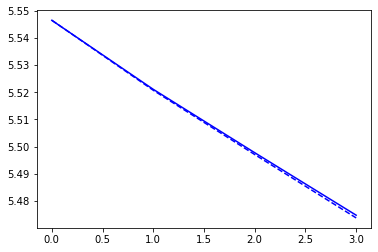

In [4]:
from matplotlib import pyplot as plt

plt.plot(epochs, training_loss, color='blue', linestyle='--')
plt.plot(epochs, testing_loss, color='blue', linestyle='-')